In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [28]:
data=pd.read_csv('3.01. Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


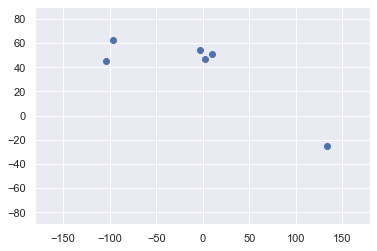

In [5]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [7]:
x=data.iloc[:,1:3]#sacamos las columans 0 y 3 y observamos las columnas 1,2
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [8]:
kmeans=KMeans(2)# k-medias es el metodo que importamos de sklearn
# el valor 2 es el nro de agrupamientos que queremos producir

In [9]:
kmeans.fit(x)

KMeans(n_clusters=2)

In [11]:
identified_clusters=kmeans.fit_predict(x)#(fit_predict) nos da la prediccion de
#agrupamiento de una matriz 
identified_clusters
#devuelve uyna matriz con los agrupamientos 
#los primeros 5 agrupamientos estan en el grupo 0 
# la ultima esta en el grupo 1 


array([0, 0, 0, 0, 0, 1])

In [12]:
#creo una nueva variable y agrego una nueva columna
data_with_clusters=data.copy()
data_with_clusters['clusters']=identified_clusters#este tiene la prediccion de agrupamiento 
data_with_clusters

,Country,Latitude,Longitude,Language,clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


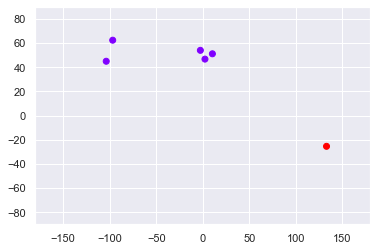

In [30]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'],c=data_with_clusters['clusters'],cmap='rainbow')
#c=data_with_clusters['clusters']indicamos que queremos tantos colores como hay grupos
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [33]:
kmeans.inertia_  #sacamos el wcss

13205.758119999999

In [36]:
wscc=[]
for i in range(1,7):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wscc_iter=kmeans.inertia_
    wscc.append(wscc_iter)
wscc


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

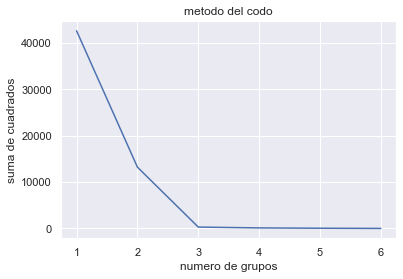

In [37]:
number_clusters=range(1,7)
plt.plot(number_clusters,wscc)
plt.title('metodo del codo')
plt.xlabel('numero de grupos')
plt.ylabel('suma de cuadrados')
plt.show()

